In [35]:
using Optim
using Distributions
using PyPlot

In [36]:
all = read("two_unfair_fake", String)

"01020021201201020102100201020102012001200122211212002102102010210201010020002110201020102012012001001201012010200201020102001201201201020120102210021021020\n"

In [37]:
n = Dict()
n['0'] = 0
n['1'] = 0
n['2'] = 0
n

Dict{Any,Any} with 3 entries:
  '0' => 0
  '1' => 0
  '2' => 0

In [38]:
for c in all
    if c in keys(n)
        n[c] = n[c] + 1
    else
        println("invalid character:", c)
    end
end

invalid character:



In [39]:
n

Dict{Any,Any} with 3 entries:
  '0' => 69
  '1' => 42
  '2' => 44

In [50]:
function prob(observed_data, model_parameter)
    n0 = observed_data[1]
    n1 = observed_data[2]
    n2 = observed_data[3]
    N = n0 + n1 + n2
    
    p1 = model_parameter[1]
    p2 = model_parameter[2]
    
    return pdf(Multinomial(N, [(1-p1)*(1-p2), (1-p1)*p2 + (1-p2)*p1, p1*p2 ]), [n0, n1, n2])
end

prob (generic function with 1 method)

In [60]:
observed_data = [n['0'], n['1'], n['2']]
# observed_data = [10, 30, 80]


p1s = 0 : 0.05 : 1
p2s = 0 : 0.05 : 1
probxy = [log(prob(observed_data, [p1, p2])) for p1 in p1s, p2 in p2s]

21×21 Array{Float64,2}:
 -Inf   -Inf       -Inf       -Inf      …   -Inf       -Inf     -Inf
 -Inf  -208.673   -165.619   -140.017      -144.308   -187.614  -Inf
 -Inf  -165.619   -128.296   -105.972      -119.54    -162.988  -Inf
 -Inf  -140.017   -105.972    -85.8744     -107.744   -151.349  -Inf
 -Inf  -122.398    -90.4805   -71.9976     -101.48    -145.26   -Inf
 -Inf  -109.527    -79.1051   -61.8468  …   -98.4492  -142.424  -Inf
 -Inf   -99.9007   -70.5866   -54.2894      -97.6589  -141.853  -Inf
 -Inf   -92.7053   -64.246    -48.7234      -98.6156  -143.06   -Inf
 -Inf   -87.47     -59.69     -44.8052     -101.064   -145.794  -Inf
 -Inf   -83.9174   -56.6905   -42.3399     -104.887   -149.948  -Inf
 -Inf   -81.8969   -55.1291   -41.2325  …  -110.06    -155.508  -Inf
 -Inf   -81.3537   -54.9729   -41.4671     -116.638   -162.545  -Inf
 -Inf   -82.32     -56.2702   -43.1041     -124.757   -171.218  -Inf
 -Inf   -84.9247   -59.1609   -46.293      -134.653   -181.792  -Inf
 -Inf   -8

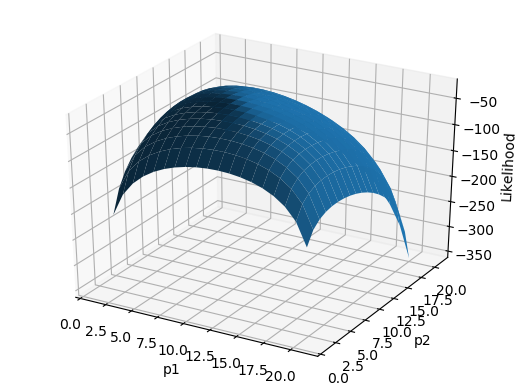

In [61]:
surf(probxy)
xlabel("p1")
ylabel("p2")
zlabel("Likelihood");

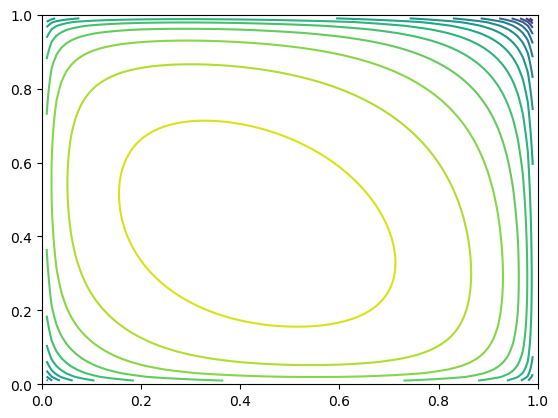

PyObject <matplotlib.contour.QuadContourSet object at 0x7fd8ff227910>

In [64]:
px = Float64[]
py = Float64[]
pz = Float64[]

p1s = 0 : 0.01 : 1
p2s = 0 : 0.01 : 1

for p1 in p1s
    for p2 in p2s
        push!(px, p1)
        push!(py, p2)
        push!(pz, log(prob(observed_data, [p1, p2])))
    end
end

px = reshape(px, (length(p2s), length(p1s)))
py = reshape(py, (length(p2s), length(p1s)))
pz = reshape(pz, (length(p2s), length(p1s)))

contour(px, py, pz, levels = 15)

In [59]:
res = optimize(p -> -(prob(observed_data, p)),  [0.4,0.4])

 * Status: success

 * Candidate solution
    Minimizer: [4.00e-01, 4.00e-01]
    Minimum:   -7.127824e-10

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [4.00e-01, 4.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    5


In [65]:
res = optimize(p -> -log(prob(observed_data, p)), [0.5,0.5])

 * Status: success

 * Candidate solution
    Minimizer: [4.19e-01, 4.19e-01]
    Minimum:   2.082114e+01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [5.00e-01, 5.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    70


In [66]:
Optim.minimizer(res)

2-element Array{Float64,1}:
 0.41935162767750084
 0.41935836115895564